In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import chess_cv.utils as utils
from sklearn import linear_model
%matplotlib inline

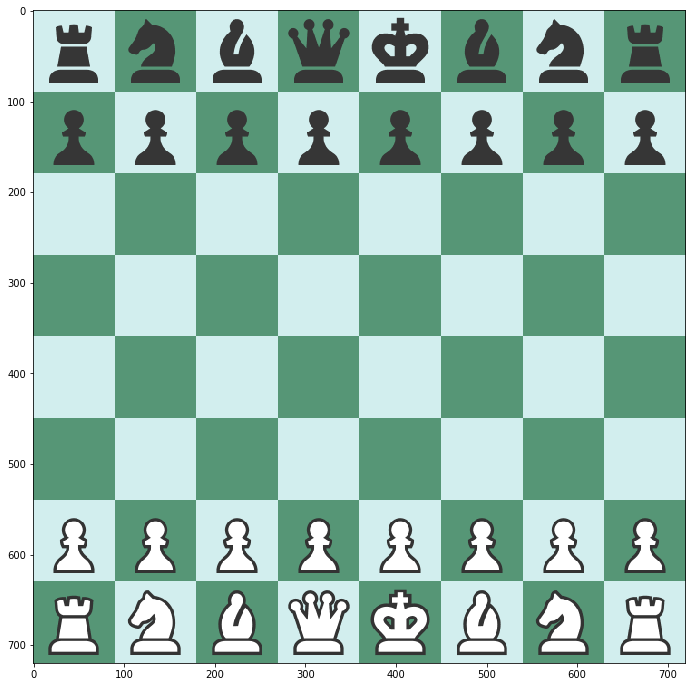

In [22]:
#img_bgr = cv2.imread('data/IMG_0649.JPG') # works
#img_bgr = cv2.imread('data/IMG_0650.JPG') # works

#img_bgr = cv2.imread('data/IMG_0648.JPG') # works with sqrt y calc and bad line filtering
#img_bgr = cv2.imread('data/IMG_0651.JPG') # works with sqrt y calc and bad line filtering
#img_bgr = cv2.imread('data/board_with_pieces.jpeg') # doesn't work (no chessboard corners detected)
#img_bgr = cv2.imread('data/empty_chessboard.png') # works
img_bgr = cv2.imread('data/chesscom_board_with_pieces.jpeg') # works
utils.imshow_lg(plt, img_bgr)

In [23]:
# downsample twice for speed
img_gray = utils.bgr2gray(img_bgr)
rows, cols = img_gray.shape
d_img = cv2.pyrDown(img_gray, dstsize=(cols // 2, rows // 2))
rows, cols = d_img.shape
d2_img = cv2.pyrDown(d_img, dstsize=(cols // 2, rows // 2))

In [24]:
# find all 49 innerchessboard corners
ret, cc = cv2.findChessboardCorners(d2_img, (7,7))
#ret, cc = cv2.findChessboardCorners(d2_img, (3,3))
assert cc.shape[0] == 49
img = np.copy(img_bgr)

# draw them
utils.draw_points(img, cc[:, 0] * 4, color=(255, 0, 0))
utils.imshow_lg(plt, img)

AttributeError: 'NoneType' object has no attribute 'shape'

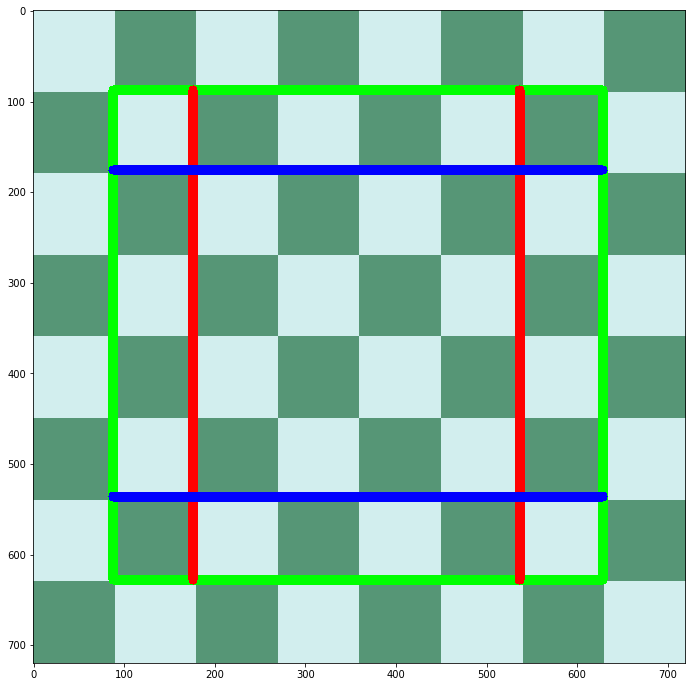

In [19]:
img = np.copy(img_bgr)

# you *can* get the convex hull, but chessBoardCorners is so good the returned corners are already sorted
# meaning you already know which corners make up the hull!

#hull = cv2.convexHull(cc, returnPoints=False)
#print(hull)
#hull = cv2.convexHull(cc, returnPoints=True)
#img = cv2.drawContours(img, [hull.astype(np.int32) * 4], -1, (255,0,255), 10, 8)

img = cv2.drawContours(img, [cc[np.array([6, 48, 42, 0])].astype(np.int32) * 4], -1, (0,255,0), 10, 8)
img = cv2.drawContours(img, [cc[np.array([5, 47])].astype(np.int32) * 4], -1, (255,0,0), 10, 8)
img = cv2.drawContours(img, [cc[np.array([1, 43])].astype(np.int32) * 4], -1, (255,0,0), 10, 8)
img = cv2.drawContours(img, [cc[np.array([7, 13])].astype(np.int32) * 4], -1, (0,0,255), 10, 8)
img = cv2.drawContours(img, [cc[np.array([35, 41])].astype(np.int32) * 4], -1, (0,0, 255), 10, 8)
utils.imshow_lg(plt, img, cmap='gray')

In [20]:
# PogU we can directly calculate the homography
indices = np.array([np.array([i, j]) for i in range(1, 8) for j in range(1, 8)]).reshape(-1, 1, 2)
h, status = cv2.findHomography(cc.astype(np.int32), indices)

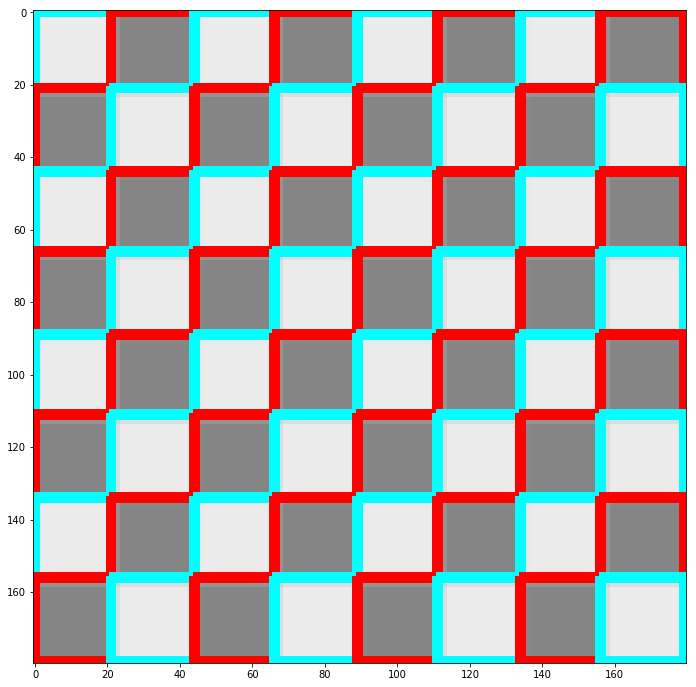

In [21]:
bih_img = np.copy(utils.gray2rgb(d2_img))

# the inverse of the homography will translate board indices (e.g. [0,0], [5,7], etc.) to 
# image coordinates (e.g. [127px, 405px], ... etc.)
ind2pt = np.linalg.inv(h)
blue = (0,255,255)
red = (255,0,0)
color = blue
for i in range(0,8):
    if color == blue:
        color = red
    else:
        color = blue
    for j in range(0,8):
        if color == blue:
            color = red
        else:
            color = blue
        points = np.array([utils.get_point(i,j,ind2pt),
                           utils.get_point(i,j+1,ind2pt),
                           utils.get_point(i+1,j+1,ind2pt),
                           utils.get_point(i+1,j,ind2pt)])
        cv2.polylines(bih_img, np.int32([points]), 1, color, thickness=2)
        
utils.imshow_lg(plt, bih_img)